In [9]:
import sys
!{sys.executable} -m pip install deap

In [10]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Load dataset
data = pd.read_csv('./jm1.csv')

# Drop any missing values
data = data.dropna()

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# GA code:

#Evaluation function for ranking
def evalMetricRanking(individual):
    # Use the order in the individual to select features
    X_train_ordered = X_train[:, individual]
    X_test_ordered = X_test[:, individual]
    
    # For demonstration, just using first three ordered features for evaluation
    X_train_selected = X_train_ordered[:, :3]
    X_test_selected = X_test_ordered[:, :3]
    
    clf = GaussianNB()
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Setting up the Genetic Algorithm

# Creating types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Registering the functions
toolbox = base.Toolbox()
N_FEATURES = X_train.shape[1]
toolbox.register("indices", random.sample, range(N_FEATURES), N_FEATURES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalMetricRanking)

# Running the Genetic Algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)
algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg     	min     	max     
0  	50    	0.802426	0.792279	0.809283


/Users/benardcharumbira/opt/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/benardcharumbira/opt/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


1  	35    	0.804954	0.800092	0.809283
2  	45    	0.805561	0.795496	0.811581
3  	39    	0.807004	0.80193 	0.811581
4  	40    	0.807215	0.797794	0.811581
5  	44    	0.8083  	0.800092	0.811581
6  	33    	0.80864 	0.798713	0.811581
7  	39    	0.808612	0.800092	0.811581
8  	41    	0.809761	0.797335	0.811581
9  	36    	0.810616	0.800092	0.811581
10 	40    	0.81125 	0.799632	0.811581
11 	39    	0.811452	0.803309	0.813419
12 	36    	0.811048	0.798254	0.813419
13 	34    	0.811112	0.802849	0.813419
14 	37    	0.810781	0.799632	0.813419
15 	44    	0.810965	0.804688	0.813419
16 	40    	0.810947	0.803768	0.813419
17 	41    	0.811857	0.803768	0.813419
18 	33    	0.812463	0.798713	0.813419
19 	36    	0.812877	0.801011	0.813419
20 	35    	0.813281	0.806526	0.813419


([[2, 3, 8, 10, 11, 13, 12, 16, 1, 9, 20, 5, 18, 17, 7, 14, 19, 4, 6, 15, 0],
  [2, 3, 8, 13, 11, 16, 4, 14, 15, 20, 19, 6, 1, 0, 5, 10, 17, 9, 7, 12, 18],
  [2, 3, 8, 12, 5, 4, 9, 18, 15, 14, 19, 6, 11, 0, 20, 17, 16, 1, 7, 13, 10],
  [2, 3, 8, 15, 11, 16, 19, 20, 14, 1, 6, 18, 5, 4, 9, 13, 17, 10, 7, 12, 0],
  [2, 3, 8, 11, 9, 15, 4, 14, 18, 10, 17, 0, 7, 19, 6, 5, 1, 12, 13, 16, 20],
  [2, 3, 8, 19, 5, 10, 18, 16, 1, 15, 4, 7, 20, 17, 12, 6, 13, 0, 9, 14, 11],
  [2, 3, 8, 10, 0, 15, 16, 14, 18, 20, 12, 6, 17, 13, 5, 9, 1, 11, 7, 19, 4],
  [2, 3, 8, 15, 9, 18, 4, 14, 16, 20, 19, 6, 1, 0, 5, 11, 12, 17, 13, 7, 10],
  [2, 3, 8, 11, 0, 15, 4, 14, 16, 20, 19, 6, 1, 13, 10, 17, 9, 7, 5, 12, 18],
  [2, 3, 8, 18, 11, 6, 14, 1, 15, 7, 20, 16, 19, 0, 5, 9, 13, 10, 17, 12, 4],
  [2, 3, 8, 7, 0, 15, 4, 10, 16, 12, 11, 17, 9, 6, 5, 13, 19, 18, 1, 14, 20],
  [2, 3, 8, 18, 5, 6, 11, 1, 15, 14, 17, 16, 20, 9, 7, 19, 0, 10, 13, 12, 4],
  [2, 3, 8, 11, 17, 15, 4, 14, 18, 10, 5, 1, 6, 9, 20, 12, 16, 1

Best ranked features:  [2, 3, 8]
Accuracy:  0.8134191176470589
              precision    recall  f1-score   support

       False       0.83      0.96      0.89      1757
        True       0.54      0.20      0.29       419

    accuracy                           0.81      2176
   macro avg       0.69      0.58      0.59      2176
weighted avg       0.78      0.81      0.78      2176



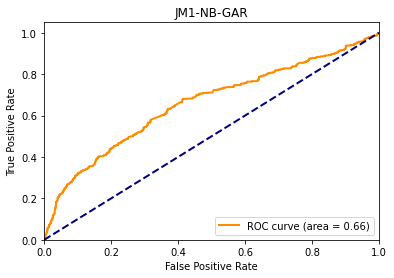

In [12]:
# Train and evaluate the KNN classifier using the best ranked features
best_ranking = hof[0]
# Let's say we use the top 3 ranked features (you can adjust this number)
selected_features = best_ranking[:3]
print("Best ranked features: ", selected_features)

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

clf = GaussianNB()
clf.fit(X_train_selected, y_train)

# Test the classifier
y_pred = clf.predict(X_test_selected)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Probabilities for the positive outcome
y_pred_proba = clf.predict_proba(X_test_selected)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Save AUC values
df = pd.DataFrame({
    'AUC': roc_auc,
    'FPR': fpr,
    'TPR': tpr
})
df.to_csv('./AUC_Extracts/JM1/JM1_NB_GAR.csv', index=False)

# Plot
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('JM1-NB-GAR')
plt.legend(loc="lower right")
plt.show()
